In [2]:
import os

# Create folders
os.makedirs('data', exist_ok=True)
os.makedirs('notebooks', exist_ok=True)
os.makedirs('src', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

print("✅ Project folders created.")


✅ Project folders created.


In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load your dataset
# Change filename if needed!
df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')

# Preview data
df.head(10)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [5]:
# Shape
print("Shape:", df.shape)

# Missing values
print(df.isnull().sum())

# Data types
print(df.dtypes)

# Class balance
df['Diabetes_012'].value_counts(normalize=True)


Shape: (253680, 22)
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthca

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

In [6]:
# Remove duplicates (good practice even if rare) no missing values but 
df_cleaned = df.drop_duplicates()

print("✅ Cleaned data shape:", df_cleaned.shape)


✅ Cleaned data shape: (229781, 22)


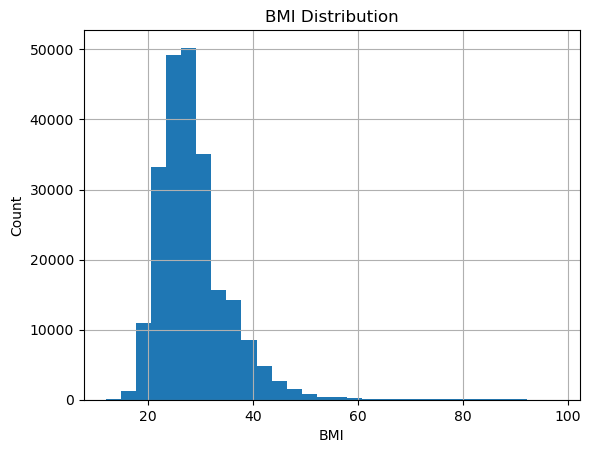

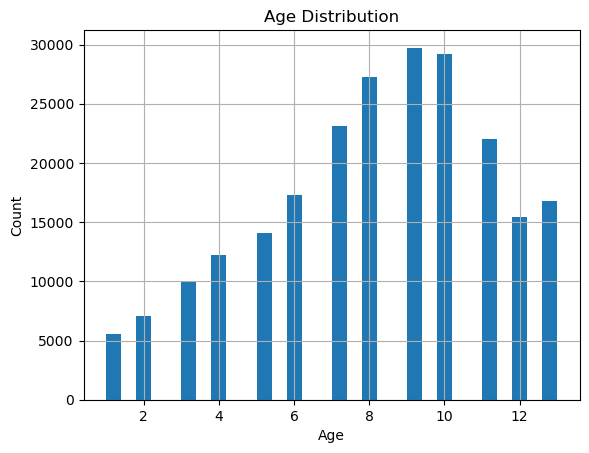

In [7]:
# BMI distribution
df_cleaned['BMI'].hist(bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Age distribution
df_cleaned['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [8]:
# X = all columns except target
X = df_cleaned.drop(columns=['Diabetes_012'])

# y = target column
y = df_cleaned['Diabetes_012']

# Split into Train and Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train shape:", X_train.shape)
print("✅ Test shape:", X_test.shape)


✅ Train shape: (183824, 21)
✅ Test shape: (45957, 21)


In [24]:
from sklearn.preprocessing import StandardScaler

# Scale for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("\n🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic, zero_division=1))

# Random Forest (no scaling needed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))

# XGBoost (removed deprecated parameter)
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, zero_division=1))



🔹 Logistic Regression Accuracy: 0.8435824660990224
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     42741
         1.0       1.00      0.00      0.00       926
         2.0       0.50      0.09      0.15      7069

    accuracy                           0.84     50736
   macro avg       0.78      0.36      0.36     50736
weighted avg       0.81      0.84      0.79     50736


🔹 Random Forest Accuracy: 0.8382608010091454
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.11      0.00      0.01       926
         2.0       0.44      0.13      0.20      7069

    accuracy                           0.84     50736
   macro avg       0.47      0.37      0.37     50736
weighted avg       0.78      0.84      0.80     50736


🔹 XGBoost Accuracy: 0.8458885209713024
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92  

C:\Users\user\AppData\Local\Temp\ipykernel_11388\1807118370.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette=colors)


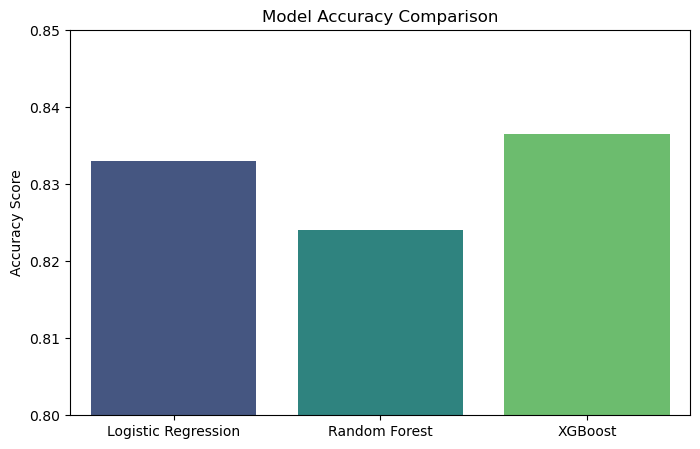

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
model_names = list(results.keys())
accuracies = list(results.values())

# Visual comparison of model accuracy
plt.figure(figsize=(8, 5))
colors = sns.color_palette('viridis', len(results))
sns.barplot(x=model_names, y=accuracies, palette=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.80, 0.85)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11388\2519615904.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DiabetesStatus', palette='Set2')


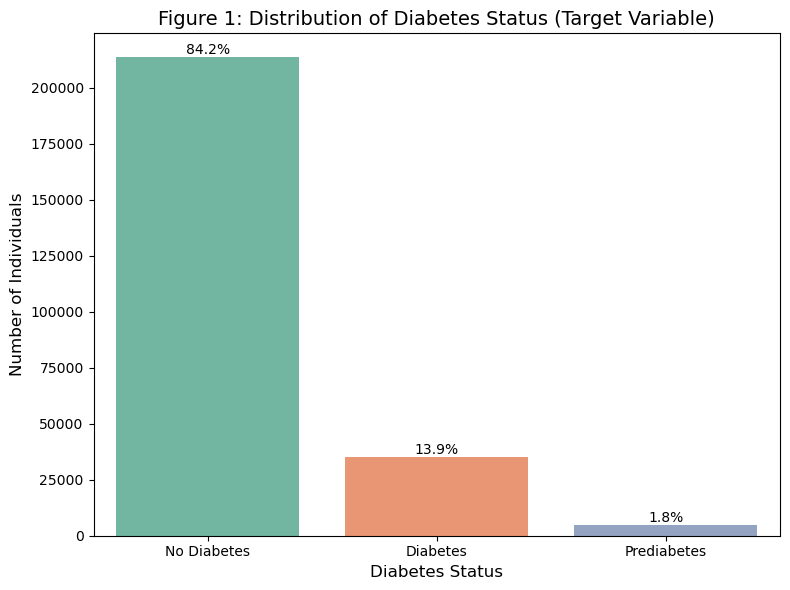

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')
# Map the target variable to readable labels
df['DiabetesStatus'] = df['Diabetes_012'].map({
    0: 'No Diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
})

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DiabetesStatus', palette='Set2')

# Add labels and title
plt.title('Figure 1: Distribution of Diabetes Status (Target Variable)', fontsize=14)
plt.xlabel('Diabetes Status', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)

# Add percentage labels on bars
total = len(df)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    plt.gca().annotate(percentage, (p.get_x() + p.get_width() / 2., count),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


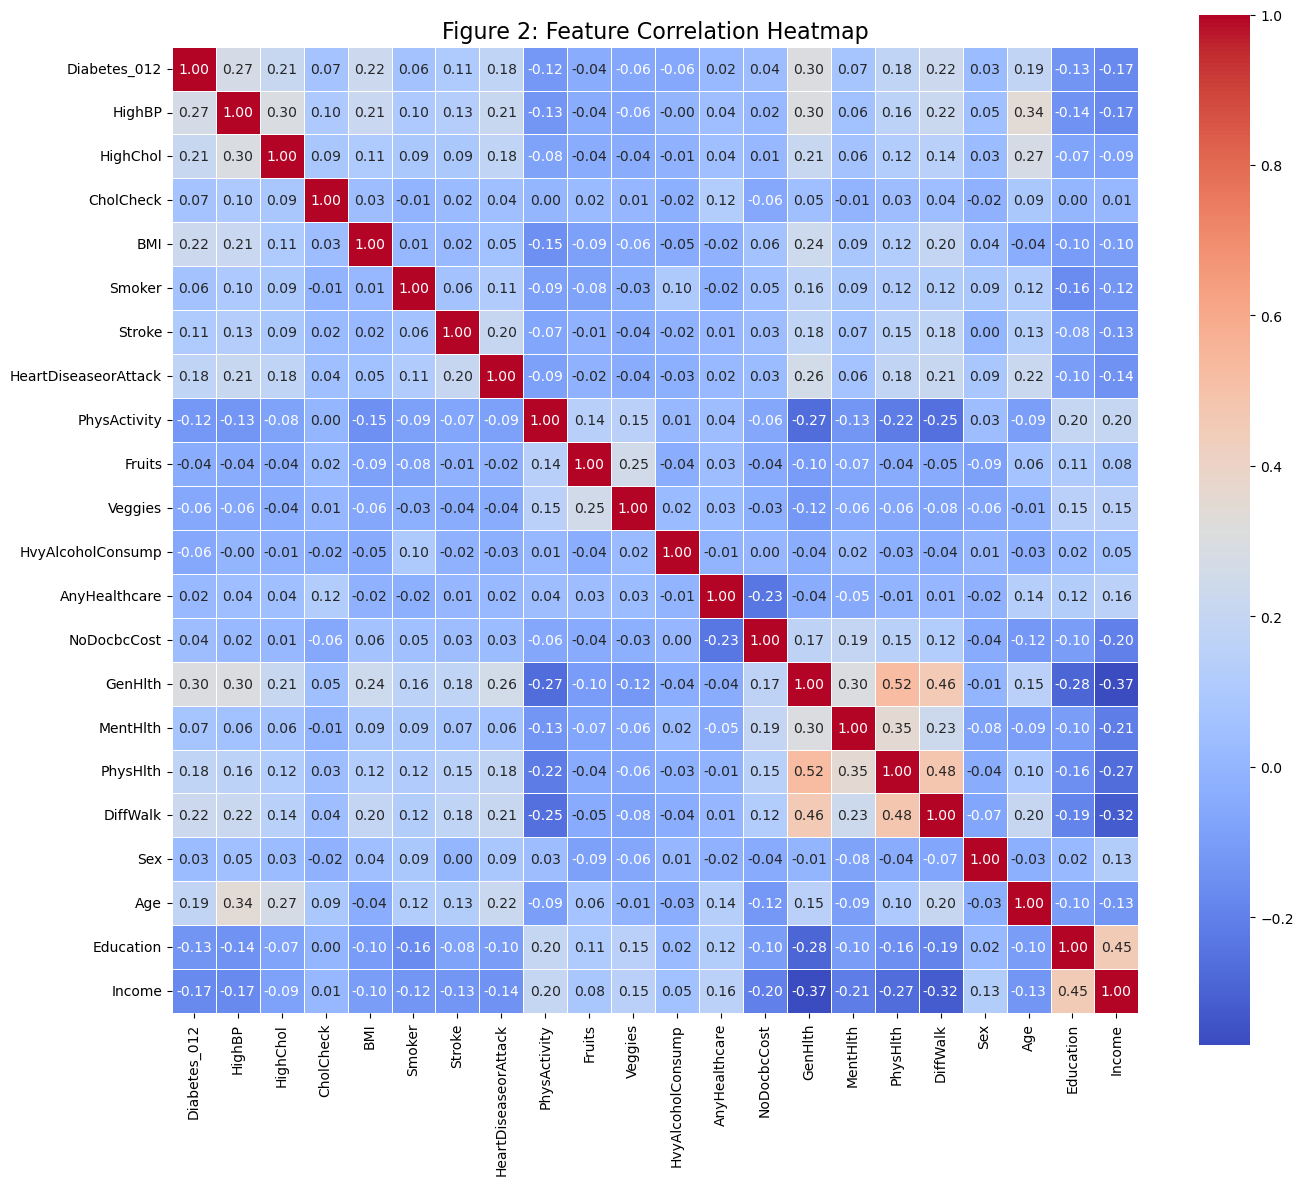

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create and save the heatmap (only once)
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Figure 2: Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png', dpi=300)  # Save as PNG
plt.show()  # Show only once


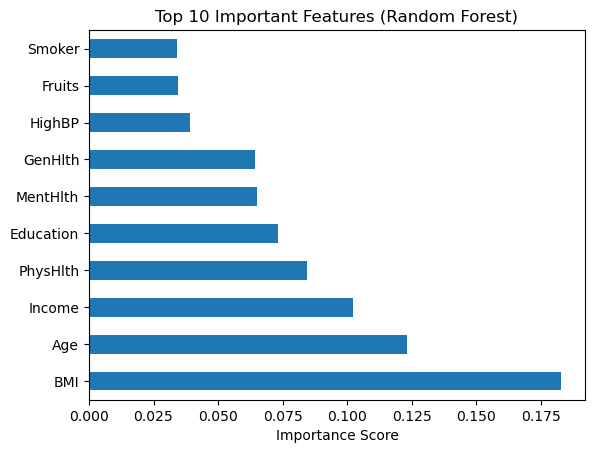

In [13]:
# Feature importance (for Random Forest)
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r'F:\master project\diabetes_012_health_indicators_BRFSS2015.csv')

# Define features and target
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# SHAP explainers
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X)

explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X)

# Plot Random Forest SHAP summary (beeswarm)
plt.figure(figsize=(12,5))
plt.title("Random Forest SHAP Summary")
shap.summary_plot(shap_values_rf[1], X, show=True)

# Plot XGBoost SHAP summary (beeswarm)
plt.figure(figsize=(12,5))
plt.title("XGBoost SHAP Summary")
shap.summary_plot(shap_values_xgb, X, show=True)

# You can also plot bar charts to compare
plt.figure(figsize=(12,5))
plt.title("Random Forest SHAP Feature Importance")
shap.summary_plot(shap_values_rf[1], X, plot_type='bar', show=True)

plt.figure(figsize=(12,5))
plt.title("XGBoost SHAP Feature Importance")
shap.summary_plot(shap_values_xgb, X, plot_type='bar', show=True)


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
